# Bakery Sales 🥖🧁🍵

#### Présentation de la source des données : <BR>
"The Bread Basket" a bakery located in Edinburgh. The dataset of transaction details of different items during the time period from Jan-2016 to Dec-2017. The dataset has 20507 entries, over 9000 transactions, and 4 columns.

#### But : déterminer le nombre de transaction et les heures d'affluence pour adapter la production et augmenter les ventes de produits.

### Import Libraries and data

In [117]:
# -- Pandas -------------------------------------------------------------------
import pandas as pd
print('pandas version is: ', pd.__version__)
# -- Numpy --------------------------------------------------------------------
import numpy as np 
# -- Scikit-Learn -------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
# -- Seaborn ------------------------------------------------------------------
import seaborn as sns
# -- Plot ---------------------------------------------------------------------
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
print("plotly version is : ", plotly.__version__)

# -- Import dataset ------------------------------------------------------------
data = pd.read_csv('Bakery.csv', delimiter=',')

pandas version is:  2.2.2
plotly version is :  4.9.0


### Data exploration and cleaning

In [118]:
print(f"The shape of the dataframe is: {data.shape}\n")
print(f"The size of the dataframe is: {data.size}\n")
print(f"The columns are: {data.columns}\n")
print('First ten entries of the dataframe: ', data.head(10))


The shape of the dataframe is: (20507, 5)

The size of the dataframe is: 102535

The columns are: Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')

First ten entries of the dataframe:     TransactionNo          Items             DateTime  Daypart  DayType
0              1          Bread  2016-10-30 09:58:11  Morning  Weekend
1              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
2              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
3              3  Hot chocolate  2016-10-30 10:07:57  Morning  Weekend
4              3            Jam  2016-10-30 10:07:57  Morning  Weekend
5              3        Cookies  2016-10-30 10:07:57  Morning  Weekend
6              4         Muffin  2016-10-30 10:08:41  Morning  Weekend
7              5         Coffee  2016-10-30 10:13:03  Morning  Weekend
8              5         Pastry  2016-10-30 10:13:03  Morning  Weekend
9              5          Bread  2016-10-30 10:13:03  Morning  Weekend

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [120]:
# To convert DateTime column to datetime datatype
data['DateTime']=pd.to_datetime(data['DateTime'])

# Create date column
data["Date"]=data["DateTime"].dt.date

# Create time column
data["Time"]=data["DateTime"].dt.time

data['Hour']=data['DateTime'].dt.hour

data.head()



,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10


In [121]:
# check for missing values

if data.isnull().any().any():
    print(f"Duplicates are present and there are {data.isnull.sum()} duplicate values")
else:
    print("There are no duplicates present in the dataset")



There are no duplicates present in the dataset


In [122]:
data['TransactionNo'].nunique()

9465

In [123]:
total_transactions = data.shape[0]
print(f"The total number of transactions is: {total_transactions}")

The total number of transactions is: 20507


In [124]:
print(f"There are {data['Items'].nunique()} unique items sold.")

There are 94 unique items sold.


In [125]:
itemFrequency = data['Items'].value_counts().sort_values(ascending=False)
itemFrequency.head(10)

Items
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: count, dtype: int64

In [126]:
items=data['Items'].value_counts().reset_index()
print(f"The top 10 least selling items in terms of quantity are: \n \n {items.tail(10)}")

The top 10 least selling items in terms of quantity are: 
 
               Items  count
84  Chimichurri Oil      2
85         Siblings      2
86     Chicken sand      1
87         The BART      1
88       Adjustment      1
89            Bacon      1
90     Gift voucher      1
91   Olum & polenta      1
92         Raw bars      1
93          Polenta      1


### EDA - Visualize data

#### Unique items

In [127]:
print(data['Items'])

0                Bread
1         Scandinavian
2         Scandinavian
3        Hot chocolate
4                  Jam
             ...      
20502           Coffee
20503              Tea
20504           Coffee
20505           Pastry
20506        Smoothies
Name: Items, Length: 20507, dtype: object


In [128]:
# Sort the DataFrame in ascending order
df_sorted = pd.DataFrame(data['Items'].value_counts()).reset_index()
df_sorted = df_sorted.head(20)
df_sorted

,Items,count
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


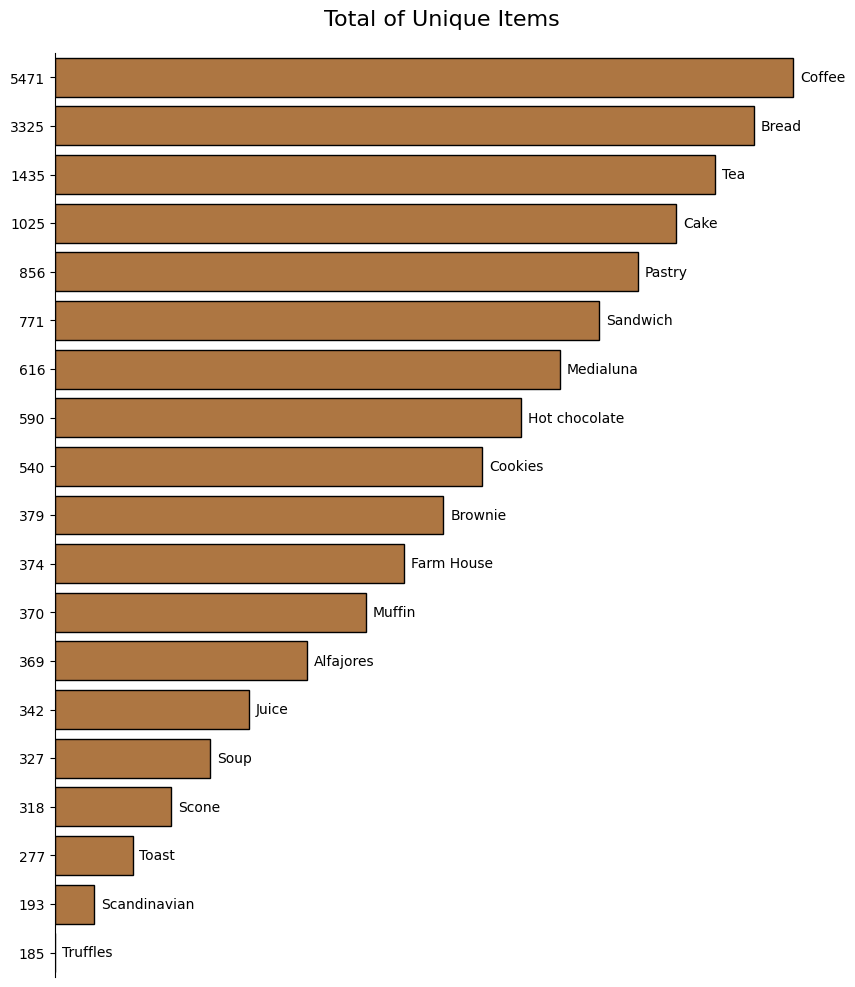

In [129]:
df_sorted.columns = ['Items', 'count']  # Rename columns for clarity

# Create a bar chart with sorted values
# --- Bars Aesthetics
color = '#bf7530'
edgecolor = 'black'

# --- Plotting Chart
plt.figure(figsize=(10, 12))

ax = sns.barplot(x= 'Items',
                 y= 'count',
                 data= df_sorted,
                 order= df_sorted['count'],
                 color= color,
                 edgecolor= edgecolor,
                 legend= False,
                 errorbar=None,
                 orient= 'h'
                )

# --- Chart Aesthetics
sns.despine()
ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# --- Chart Labels
plt.xlabel('Items')
plt.ylabel(None, labelpad=20)
plt.title('Total of Unique Items', fontsize=16, pad=20)

# --- Bars Labels
for p in ax.patches:
    item_name = df_sorted['Items'][int(p.get_y() + p.get_height() / 2)]  # Get the item name
    ax.annotate(f'{item_name}',  
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# --- Display
plt.show()


In [130]:
# Count the number of items per transaction
items_per_transaction = data.groupby('TransactionNo')['Items'].count()

# Calculate the average number of items per transaction
average_items_per_transaction = items_per_transaction.mean()

print(f"The average number of items per transaction is: {average_items_per_transaction}")

The average number of items per transaction is: 2.1666138404648705



The total number of transaction done is 20507.<BR>
There are 94 unique items sold. <BR>
The average number of items per transaction : 2.1666138404648705



#### Day & Time Analysis

In [131]:
# Time range of dataset
max_time = data['DateTime'].max()
min_time = data['DateTime'].min()

print(f"The minimum time is: {min_time}")
print(f"The maximum time is: {max_time}")



The minimum time is: 2016-01-11 07:51:20
The maximum time is: 2017-12-03 16:28:00


#### Peak hours for transactions during the day

In [132]:
# peak hours for transactions during the day
hour_sales=data["Hour"].value_counts().reset_index()
hour_sales.head(5)

,Hour,count
0,11,3102
1,12,2854
2,10,2666
3,14,2640
4,13,2617


#### Transactions during parts of the day

In [133]:
day_transaction=data.groupby('Daypart')['TransactionNo'].count().reset_index()
day_transaction.sort_values(by=['TransactionNo'],ascending=False)

,Daypart,TransactionNo
0,Afternoon,11569
2,Morning,8404
1,Evening,520
3,Night,14


In [134]:
# extract from date & create Day and Month and Year columns
dateTime=pd.to_datetime(data['DateTime'])
data['Day']=dateTime.dt.day_name()
data['Month']=dateTime.dt.month_name()
data['Year']=data['DateTime'].dt.year

data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'Date',
       'Time', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')

#### Transaction by day of the week

In [135]:
#visualize transactions by day
avg_trans_day = data.groupby('Day')['TransactionNo'].count().reset_index()

# Define order for the 'Daypart' categories
daypart_order = ['Morning', 'Afternoon', 'Evening', 'Night'] 
# Define order of 'Day' categories
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig=px.bar(avg_trans_day,
           x='Day',
           y='TransactionNo',
           title="Bar chart representing the average number of transactions by day",
           category_orders={'Day': day_order},  # Specify the order here
           text='TransactionNo'  # display values on the bars
           )

# Update the appearance of the bars
fig.update_traces(marker_color='#bf7530',
                  marker_line_color='black',
                  marker_line_width=1, textposition='outside'
                  )
# Adjust the height of the figure
fig.update_layout(height=600)  
# Show the plot
fig.show()



#### Daypart and DayType Trends:

How do the number of transactions vary across different dayparts (e.g., morning, afternoon, evening)?<BR>
Is there a difference in transaction patterns between weekdays and weekends?<BR>
Which daypart and day type combination has the highest transaction frequency?


In [136]:
daypart_frequency = data['Daypart'].value_counts().reset_index().rename(columns={'index': 'Daypart',
                                                                                 'count': 'Frequency'
                                                                                 })
daypart_frequency

,Daypart,Frequency
0,Afternoon,11569
1,Morning,8404
2,Evening,520
3,Night,14


In [137]:
fig = px.pie(daypart_frequency, names='Daypart', values='Frequency', title='Daypart Frequency Distribution')

#customizing the plot
fig = px.pie(daypart_frequency, 
             names='Daypart', 
             values='Frequency', 
             title='Daypart Frequency Distribution',
             color_discrete_sequence=px.colors.qualitative.Set3,  # color palette
             hole=0.4,  # size of the center hole
             labels={'Daypart': 'Daypart Category', 'Frequency': 'Count'},  # name axis labels
             )

# Show the plot
fig.show()

c:\Python312\Lib\site-packages\plotly\express\_core.py:1871: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Python312\Lib\site-packages\plotly\express\_core.py:1871: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [138]:
data.groupby('DayType')['Daypart'].count()

DayType
Weekday    12807
Weekend     7700
Name: Daypart, dtype: int64

In [139]:
transaction_counts = data.groupby(['Daypart', 'DayType']).size().reset_index(name='TransactionCount')

# combination with the highest transaction frequency
max_transaction_combination = transaction_counts.loc[transaction_counts['TransactionCount'].idxmax()]

print(f"The daypart and day type combination with the highest transaction frequency is:")
print(max_transaction_combination[['Daypart', 'DayType']])

The daypart and day type combination with the highest transaction frequency is:
Daypart    Afternoon
DayType      Weekday
Name: 0, dtype: object


In [140]:
aggregated_data = data.groupby(['DayType', 'Daypart', 'Year', 'Hour'])['TransactionNo'].count().reset_index()
aggregated_data

,DayType,Daypart,Year,Hour,TransactionNo
0,Weekday,Afternoon,2016,12,734
1,Weekday,Afternoon,2016,13,642
2,Weekday,Afternoon,2016,14,621
3,Weekday,Afternoon,2016,15,493
4,Weekday,Afternoon,2016,16,332
...,...,...,...,...,...
56,Weekend,Morning,2017,11,800
57,Weekend,Night,2016,21,2
58,Weekend,Night,2017,21,1
59,Weekend,Night,2017,22,6


Are there specific days or time periods with higher transaction volumes?

#### Best performance by day

In [141]:
mpd = data.groupby('Day')['Items'].count().sort_values(ascending=False)
fig = px.bar(mpd, title='Most Productive Day', color=mpd, color_continuous_scale=px.colors.sequential.Oranges)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=0, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()



In [142]:
mpm = data.groupby('Month')['Items'].count().sort_values(ascending=False)
fig = px.bar(mpm, title='Most Productive Month', color=mpm, color_continuous_scale=px.colors.sequential.Oranges)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=0, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

### EDA with combinations

In [143]:
# --- Find unique items
uniques = data['Items'].unique()

# --- Items dataset creation
data_items = pd.DataFrame({'name': uniques,
                         'number' : range(1, len(uniques) + 1)
                        })

# --- Display
data_items.head()

,name,number
0,Bread,1
1,Scandinavian,2
2,Hot chocolate,3
3,Jam,4
4,Cookies,5


In [144]:
 # Mapping items numbers
data['ItemsNo'] = data['Items'].map(data_items.set_index('name')['number'])

# --- Display
data.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,Hour,Day,Month,Year,ItemsNo
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11,9,Sunday,October,2016,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10,Sunday,October,2016,2
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10,Sunday,October,2016,2
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,Sunday,October,2016,3
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,Sunday,October,2016,4


In [145]:
# --- Grouping by transactions
data_grouped = data.groupby('TransactionNo').agg({'Items': ', '.join,
                                              'ItemsNo': lambda x: ', '.join(map(str, x)),
                                              'DateTime': 'first',
                                              'Daypart': 'first',
                                              'DayType': 'first'
                                             }).reset_index()

# --- Display
data_grouped

,TransactionNo,Items,ItemsNo,DateTime,Daypart,DayType
0,1,Bread,1,2016-10-30 09:58:11,Morning,Weekend
1,2,"Scandinavian, Scandinavian","2, 2",2016-10-30 10:05:34,Morning,Weekend
2,3,"Hot chocolate, Jam, Cookies","3, 4, 5",2016-10-30 10:07:57,Morning,Weekend
3,4,Muffin,6,2016-10-30 10:08:41,Morning,Weekend
4,5,"Coffee, Pastry, Bread","7, 8, 1",2016-10-30 10:13:03,Morning,Weekend
...,...,...,...,...,...,...
9460,9680,Bread,1,2017-09-04 14:24:03,Afternoon,Weekend
9461,9681,"Truffles, Tea, Spanish Brunch, Christmas common","45, 10, 74, 87",2017-09-04 14:30:09,Afternoon,Weekend
9462,9682,"Muffin, Tacos/Fajita, Coffee, Tea","6, 94, 7, 10",2017-09-04 14:32:58,Afternoon,Weekend
9463,9683,"Coffee, Pastry","7, 8",2017-09-04 14:57:06,Afternoon,Weekend


In [146]:
df = data_grouped

In [147]:
# --- Finding unique combinations
combinations = df['Items'].unique()

# --- Combinations Dataset Creation
df_combinations = pd.DataFrame({'name': combinations,
                                'number' : range(1, len(combinations) + 1)
                                })

# --- Display
df_combinations.head()

,name,number
0,Bread,1
1,"Scandinavian, Scandinavian",2
2,"Hot chocolate, Jam, Cookies",3
3,Muffin,4
4,"Coffee, Pastry, Bread",5


In [148]:
# --- Mapping combinations
df['CombinationsNo'] = df['Items'].map(df_combinations.set_index('name')['number'])

# --- Display
df

,TransactionNo,Items,ItemsNo,DateTime,Daypart,DayType,CombinationsNo
0,1,Bread,1,2016-10-30 09:58:11,Morning,Weekend,1
1,2,"Scandinavian, Scandinavian","2, 2",2016-10-30 10:05:34,Morning,Weekend,2
2,3,"Hot chocolate, Jam, Cookies","3, 4, 5",2016-10-30 10:07:57,Morning,Weekend,3
3,4,Muffin,6,2016-10-30 10:08:41,Morning,Weekend,4
4,5,"Coffee, Pastry, Bread","7, 8, 1",2016-10-30 10:13:03,Morning,Weekend,5
...,...,...,...,...,...,...,...
9460,9680,Bread,1,2017-09-04 14:24:03,Afternoon,Weekend,1
9461,9681,"Truffles, Tea, Spanish Brunch, Christmas common","45, 10, 74, 87",2017-09-04 14:30:09,Afternoon,Weekend,2892
9462,9682,"Muffin, Tacos/Fajita, Coffee, Tea","6, 94, 7, 10",2017-09-04 14:32:58,Afternoon,Weekend,2893
9463,9683,"Coffee, Pastry","7, 8",2017-09-04 14:57:06,Afternoon,Weekend,68


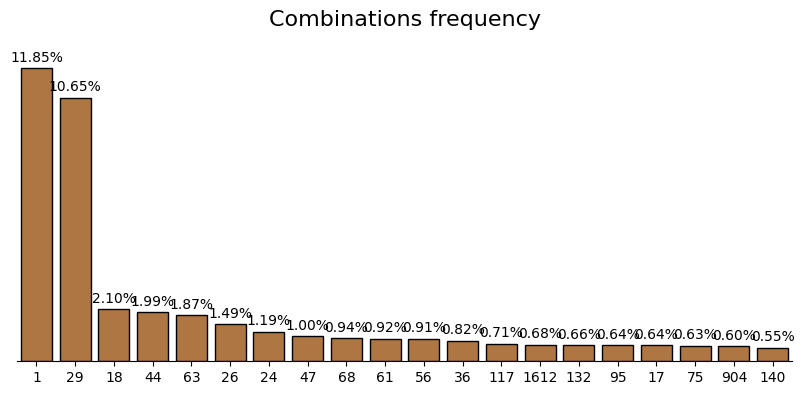

In [149]:
# --- Data (Top results)
df = df['CombinationsNo'].value_counts(normalize= True, ascending= False).head(20).reset_index()
df = df.sort_values(by='proportion', ascending= False)


# --- Bars Aesthetics
color = '#bf7530'
edgecolor = 'black'

# --- Plotting Chart
plt.figure(figsize=(10, 4))

ax = sns.barplot(x='CombinationsNo',
                 y='proportion',
                 data= df,
                 order= df['CombinationsNo'],
                 color= color,
                 edgecolor= edgecolor,
                 legend= False
                )

# --- Chart Aesthetics
sns.despine()
ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])

# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Combinations frequency', fontsize=16, pad=20)

# --- Bars Labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# --- Display
plt.show()

In [150]:
# --- Mapping Combinations Names
df['Combination'] = df['CombinationsNo'].map(df_combinations.set_index('number')['name'])

# --- Frequency column creation
df['Frequency'] = round(df['proportion']*100, 2)

# --- Combinations Frequency Dataset Creation
df_frequencies = df[['Combination', 'Frequency']]

# --- Display
df_frequencies

,Combination,Frequency
0,Bread,11.85
1,Coffee,10.65
2,Farm House,2.10
3,Tea,1.99
4,"Coffee, Coffee",1.87
5,"Coffee, Bread",1.49
6,Scandinavian,1.19
7,Cake,1.00
8,"Coffee, Pastry",0.94
9,"Bread, Coffee",0.92


In [151]:
# Check the columns in the DataFrame
data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'Date',
       'Time', 'Hour', 'Day', 'Month', 'Year', 'ItemsNo'],
      dtype='object')

In [152]:
df.columns

Index(['CombinationsNo', 'proportion', 'Combination', 'Frequency'], dtype='object')

In [153]:
data_grouped.columns

Index(['TransactionNo', 'Items', 'ItemsNo', 'DateTime', 'Daypart', 'DayType',
       'CombinationsNo'],
      dtype='object')

In [154]:
hours_included = data[(data['Hour'] > 6) & (data['Hour'] < 21)]

In [155]:
datah = hours_included.groupby('Hour')['Items'].count().reset_index()

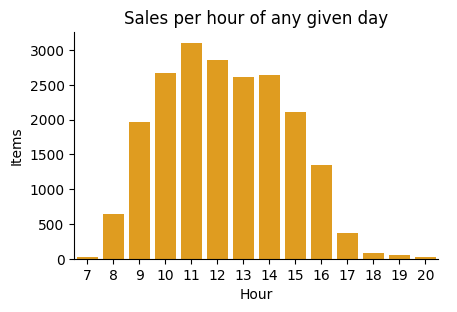

In [156]:
# Create the catplot with specified size

sns.catplot(x='Hour',
            y="Items",
            data=datah, 
            kind="bar", 
            color="orange", 
            # order=datah["Items"].value_counts().index,
            errorbar=None,
            height=3,  # Set the height of the plot
            aspect=1.5  # Set the aspect ratio (width/height)
            )
# Add title and show the plot
plt.title('Sales per hour of any given day')
plt.show()


### Machine Learning

In [157]:
# Mapping for Daypart to numerical values
daypart_mapping = {
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
}

# Create a new column 'Daypart_num' by mapping the values
data['Daypart_num'] = data['Daypart'].map(daypart_mapping)

# Display the updated DataFrame
data.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,Hour,Day,Month,Year,ItemsNo,Daypart_num
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11,9,Sunday,October,2016,1,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10,Sunday,October,2016,2,1
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10,Sunday,October,2016,2,1
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,Sunday,October,2016,3,1
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,Sunday,October,2016,4,1


In [158]:
# Group by date and daypart to calculate daily sales
daily_sales = data.groupby(['DateTime', 'Daypart']).size().reset_index(name='Sales')

# Prepare feature set
daily_sales['Date'] = daily_sales['DateTime'].dt.date
daily_sales['Hour'] = daily_sales['DateTime'].dt.hour 
daily_sales['Daypart'] = daily_sales['Daypart'].astype('category').cat.codes
daily_sales['Weekday'] = pd.to_datetime(daily_sales['Date']).dt.dayofweek

# Create features and target variable
X = daily_sales[['Daypart', 'Weekday', 'Hour']]
y = daily_sales['Sales']
daily_sales

,DateTime,Daypart,Sales,Date,Hour,Weekday
0,2016-01-11 07:51:20,2,2,2016-01-11,7,0
1,2016-01-11 08:20:50,2,2,2016-01-11,8,0
2,2016-01-11 08:22:28,2,2,2016-01-11,8,0
3,2016-01-11 08:45:20,2,2,2016-01-11,8,0
4,2016-01-11 09:07:47,2,3,2016-01-11,9,0
...,...,...,...,...,...,...
9460,2017-12-03 15:25:32,0,2,2017-12-03,15,6
9461,2017-12-03 15:38:22,0,2,2017-12-03,15,6
9462,2017-12-03 15:45:06,0,4,2017-12-03,15,6
9463,2017-12-03 15:45:55,0,2,2017-12-03,15,6


In [159]:
daily_sales.columns

Index(['DateTime', 'Daypart', 'Sales', 'Date', 'Hour', 'Weekday'], dtype='object')

In [160]:
# # Split your data in train and test sets
# # Divide dataset Train set & Test set 
# print("Splitting dataset into train set and test set...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')





Mean Squared Error: 1.6166802483455132


#### Train & Test split

In [161]:
# Make all the required preprocessings on the train set
# Encoding categorical features and standardizing numeric features
# Convert X_train to a DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train) 

# Print the first few rows of the training data
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())  



#### X_train BEFORE preprocessing ####
      Daypart  Weekday  Hour
2846        0        2    16
472         2        0     9
4123        0        2    12
6740        0        4    16
4091        2        2     9


In [162]:
future_hour = pd.DataFrame({
    'Daypart': [1],  # Example: 1 for Morning (make sure to use the correct encoding)
    'Weekday': [5],  # Example: 2 for Tuesday (0=Monday, 1=Tuesday, ..., 6=Sunday)
    'Hour': [11]     # Predicting for 11 AM
})

# Make the prediction
predicted_sales = model.predict(future_hour)

# Print the predicted sales
print(f'Predicted bread sales Saturday at 11h00: {predicted_sales[0]}')

Predicted bread sales Saturday at 11h00: 2.180594646121112


In [163]:
dataf = pd.DataFrame(data)

# Feature Engineering
# dataf['Daypart'] = dataf['Daypart'].astype('category').cat.codes
dataf['DayType'] = dataf['DayType'].astype('category').cat.codes
dataf['Day'] = dataf['Day'].astype('category').cat.codes
dataf['Month'] = dataf['Month'].astype('category').cat.codes

# Define features and target
X = dataf[['DayType', 'Hour','Day', 'Month']]
y = dataf['TransactionNo']  # to predict the number of transactions

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
    })

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
for index, row in importance_df.iterrows():
    print(f'Feature: {row["Feature"]}, Importance: {row["Importance"]}')

Mean Squared Error: 2791686.7696180274
Feature: Month, Importance: 0.545238989522276
Feature: Day, Importance: 0.24075613582566008
Feature: DayType, Importance: 0.14518813049447143
Feature: Hour, Importance: 0.06881674415759242


In [164]:
print('Model Scoring')
print(f'Train Score : {model.score(X_train, y_train):.4f}')
print(f'Test Score :  {model.score(X_test, y_test):.4f}')

Model Scoring
Train Score : 0.6686
Test Score :  0.6366


C:\Users\Karen\AppData\Local\Temp\ipykernel_3076\1983144360.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




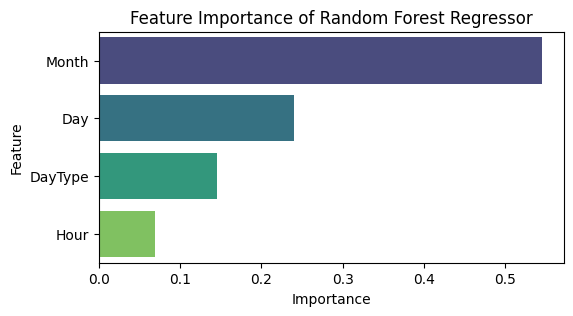

In [165]:
# Visualize ranked features using seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance',
            y="Feature",
            data=importance_df,
            palette="viridis"
            )
plt.title('Feature Importance of Random Forest Regressor')
plt.show()

#### Conclusion et recommendations : <BR>
Les mois d'affluence (plutôt hiver : Novembre à Mars), les jours d'affluence (plutôt en weekend : Vendredi à Lundi), les heures d'affluence en après-midi (11h et de 12h à 15h). <BR>
Recommendations :<BR>
Pour adapter la production et augmenter les ventes, on pourrait suggérer des combinaisons de produits en formule (Coffee and Bread, Tea and Cake) ou en combinant avec des produits moins achetés (Coffee and Cookies or Muffins, Tea and Brownies or Scone), créer des ventes d'invendus en fin de journée ou créant des produits de saison pendant les mois de période 'creuses' (Avril à Octobre) tel que création de patisseries du printemps, été et automne.<BR>
Sans une idée exacte du client moyen ni la situation géographique du site, nous sommes limité dans les recommendations.